# Loan Default Prediction - Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

##### Load Data

In [4]:
loan_data = pd.read_csv("../data/loan_data_cleaned.csv", index_col=0)

loan_data.head()

,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
Age,,,,,,,,,,,,,,,,
56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


##### Quick EDA Precheck 

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, 56 to 62
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Income          255347 non-null  int64  
 1   LoanAmount      255347 non-null  int64  
 2   CreditScore     255347 non-null  int64  
 3   MonthsEmployed  255347 non-null  int64  
 4   NumCreditLines  255347 non-null  int64  
 5   InterestRate    255347 non-null  float64
 6   LoanTerm        255347 non-null  int64  
 7   DTIRatio        255347 non-null  float64
 8   Education       255347 non-null  int64  
 9   EmploymentType  255347 non-null  int64  
 10  MaritalStatus   255347 non-null  int64  
 11  HasMortgage     255347 non-null  int64  
 12  HasDependents   255347 non-null  int64  
 13  LoanPurpose     255347 non-null  int64  
 14  HasCoSigner     255347 non-null  int64  
 15  Default         255347 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 33.1 MB


In [6]:
loan_data.describe()

,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,1.494421,1.500096,0.999918,0.500014,0.500268,2.000501,0.500108,0.116128
std,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,1.118826,1.117358,0.816051,0.500001,0.500001,1.412723,0.500001,0.320379
min,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000
max,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,3.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [7]:
print(loan_data.isnull().sum())

Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


##### Precheck looks good. Now we are going to save this as df and move on to the Exploratory Data Analysis

In [9]:
df = loan_data

Quick review of the target variable

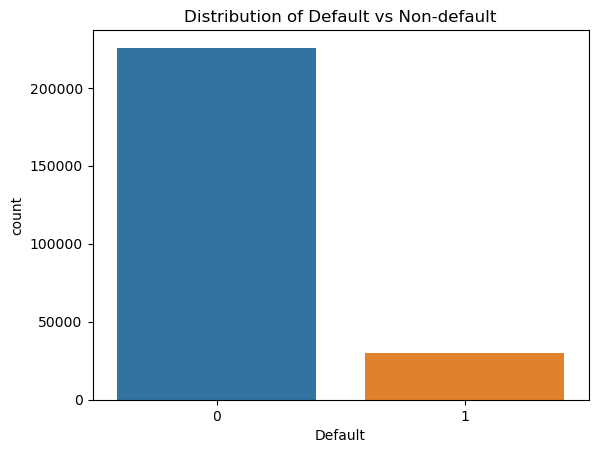

In [11]:

sns.countplot(x='Default', data=df)
plt.title('Distribution of Default vs Non-default')
plt.show()

Visualization of all features

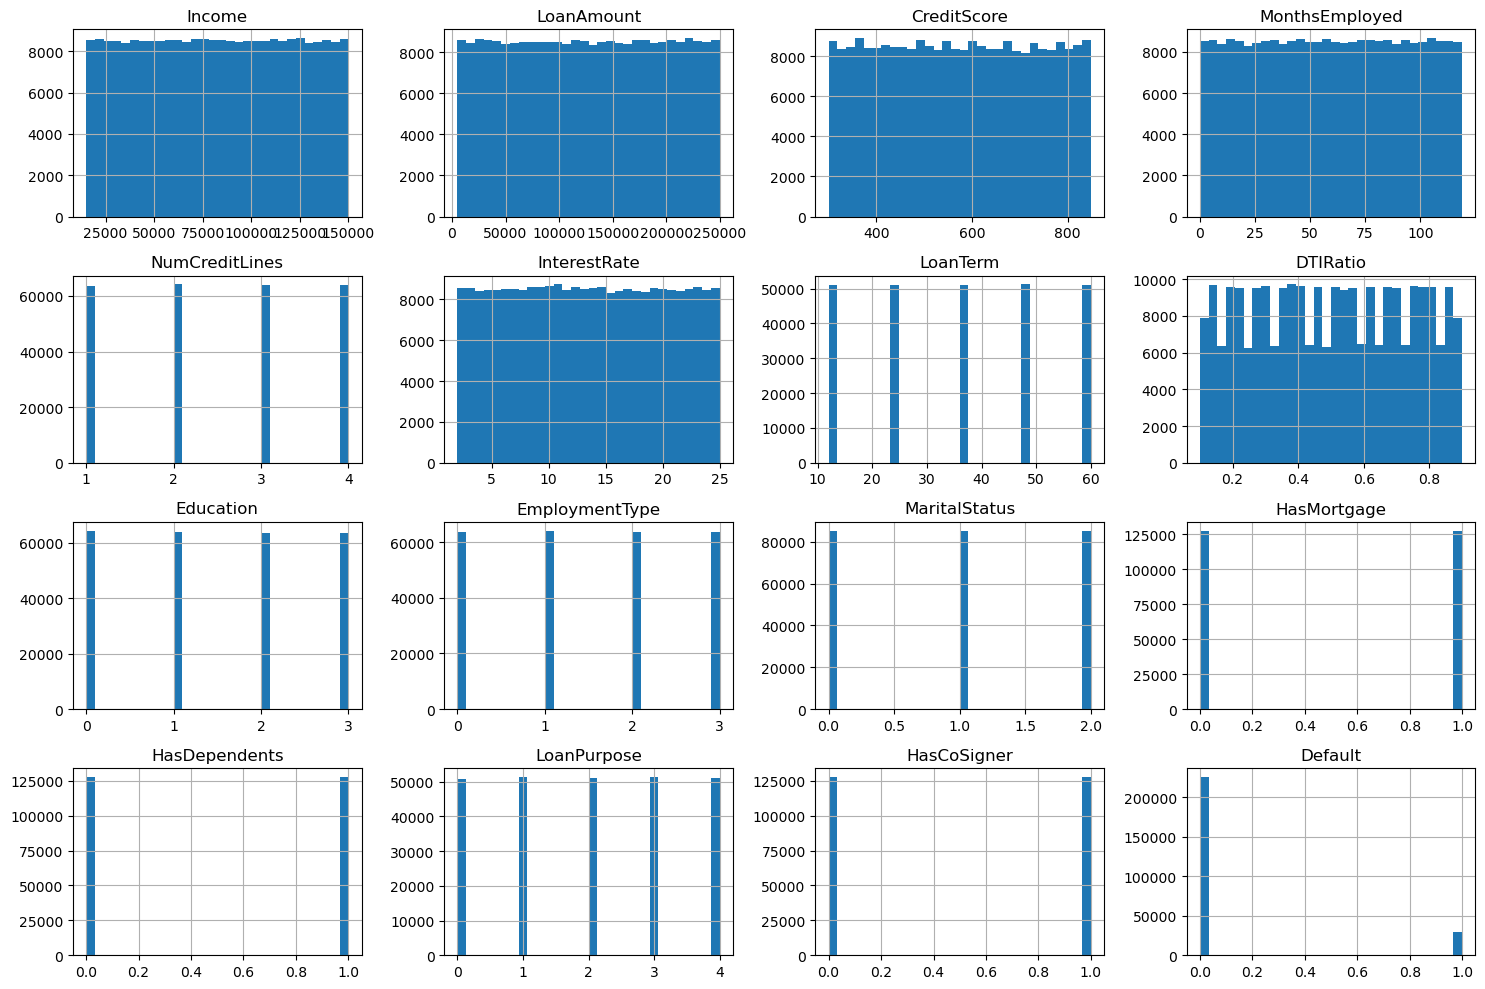

In [10]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

###### Observation
The continuous features seem to have somewhat uniform distributions with a few peaks. It might be a good idea to further explore if there is any skewness, particularly in the Income and LoanAmount distributions. 

As for the categorical features, they show distinct categories with clear separation in their histograms

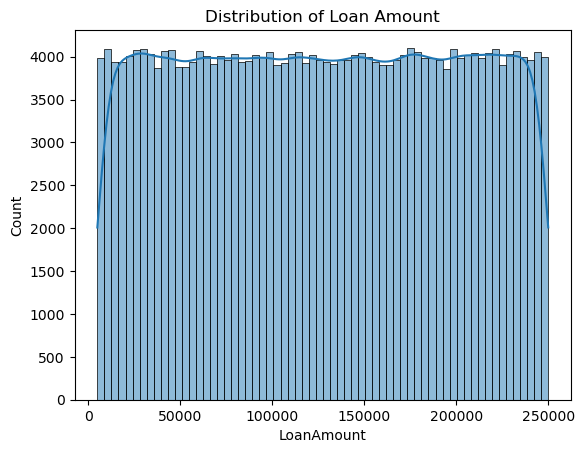

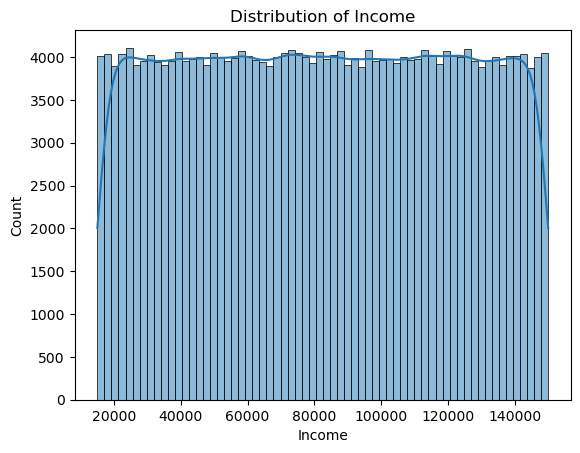

In [13]:
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

sns.histplot(df['Income'], kde=True)
plt.title('Distribution of Income')
plt.show()

Looking at the distributions of LoanAmount and Income, the data seems fairly uniform, with values spread across the entire range.

Identify potential predictors of default - features that would influence the likelihood of the loan defauling. In this case we need to examine relationships between these feature and the target variable

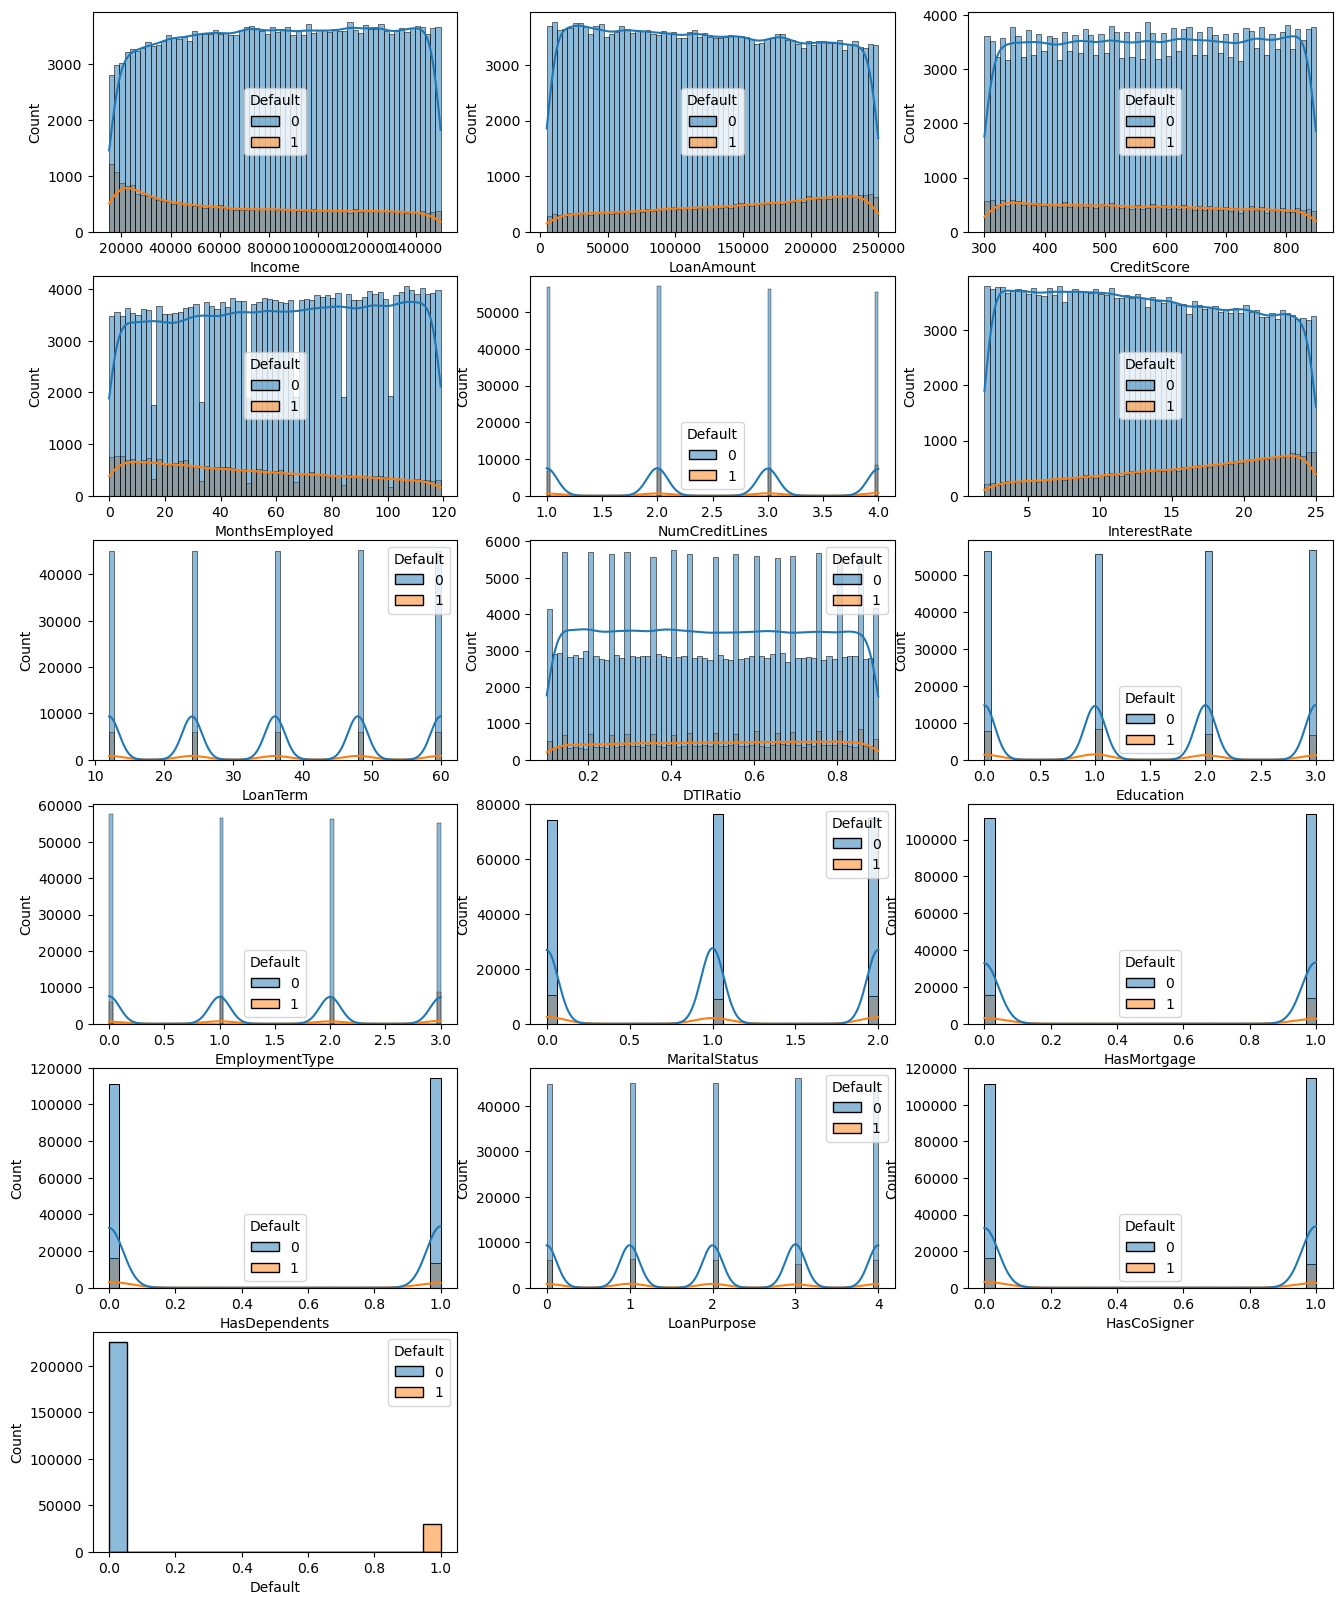

In [17]:
# numberical featuers - for distribution of features and plot them
num_feat = df.select_dtypes(include=['float64', 'int64']). columns 

plt.figure(figsize=(16,20))
for i, feature in enumerate(num_feat, 1):
    plt.subplot(6,3,i)
    sns.histplot(data=df, x=feature, hue='Default', kde=True)
plt.show()

## Feature Correlation

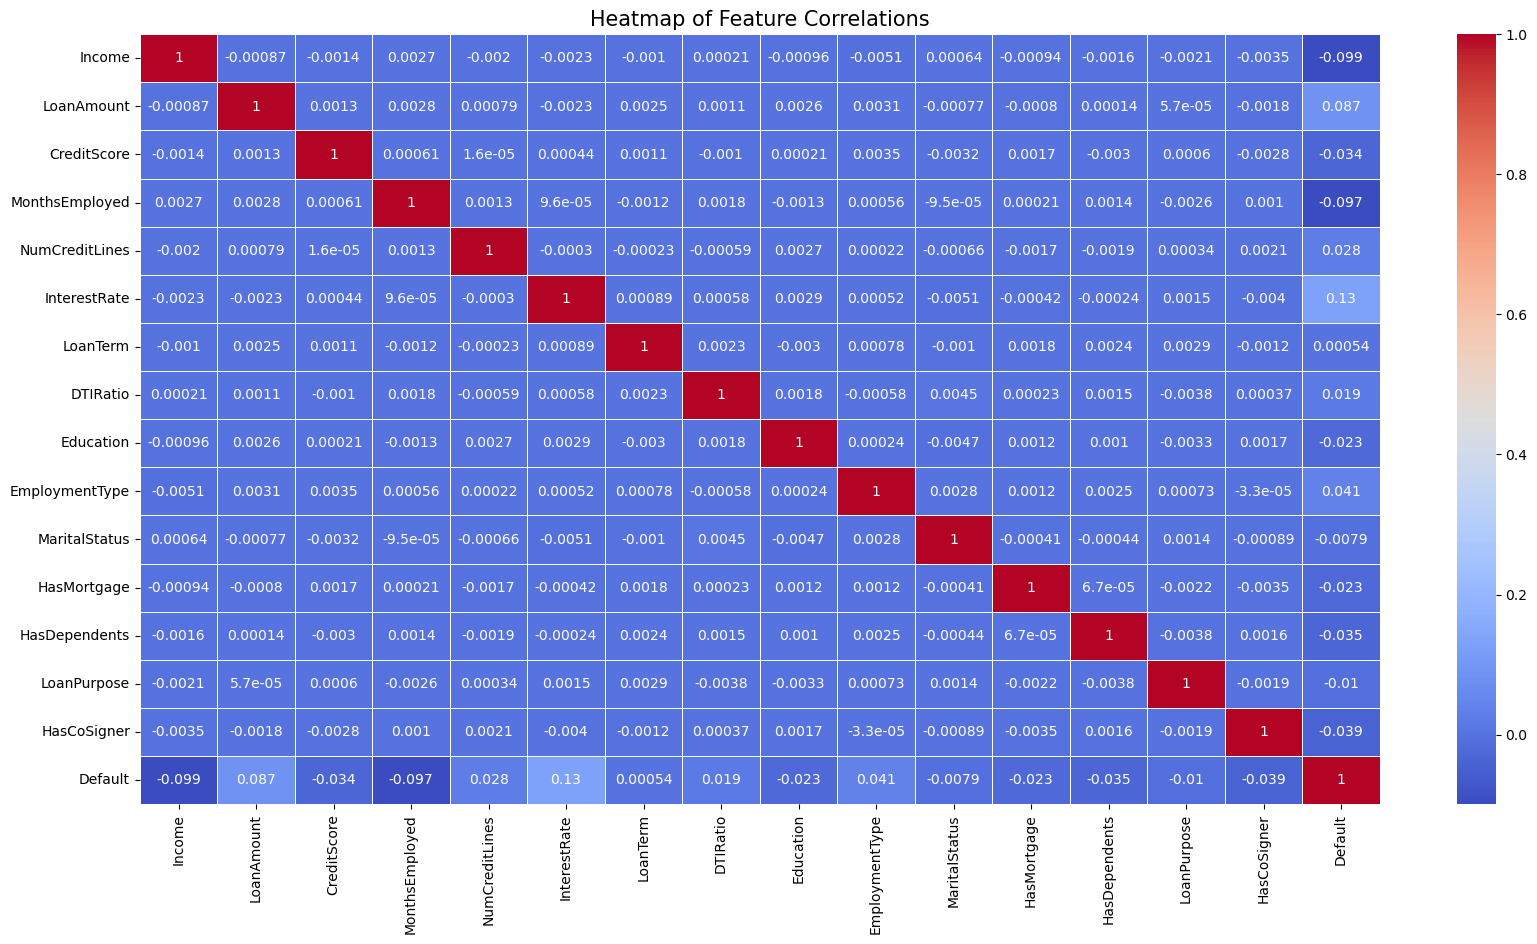

In [15]:
corr_matrix = loan_data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations', size=15)
plt.show()

### Correlations with Default (Target Variable):

<b>InterestRate (0.13): </b> There is a moderate positive correlation between InterestRate and Default, though it's still relatively weak at 0.13, it is still the highest correlation with default. This suggests that borrowers with higher interest rates are at slightly higher risk of default. 

<b>Income (-0.099): </b> There is a weak negative correlation between Income and Default, suggesting that as income increases, the likelihood of default slightly decreases.

<b> MonthsEmployed (-0.097): </b> Similarly, there is a weak negative correlation here, implying that individuals with longer employment histories are slightly less likely to default.

<b>LoanAmount (0.087):</b> There's a weak positive correlation with loan amount, indicating a small increase in the likelihood of default with higher loan amounts.

<b>CreditScore (-0.034):</b> This weak negative correlation indicates that higher credit scores are slightly associated with lower default risk.

### Correlations Between Features:
There are no particularly strong correlations (close to 1 or -1) between the features themselves, which means multicollinearity does not seem to be a significant issue in your dataset.



## Next Steps
We will now proceed to the Modeling. Depending on the model accuracy we will come back to feature engineering if need be. 